In [12]:
import os 
import numpy as np
from matplotlib import pyplot as plt
import cv2
from keras.api import layers, models, callbacks
import tensorflow as tf

In [2]:
EMBEDDING_DIM = 2

In [3]:
x = np.load('../datasets/tp4/pipeline_images.npy')

In [4]:
x.shape

(1112, 228, 308, 3)

In [5]:
def preprocess(imgs):
    gray_images = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in imgs])
    gray_images = gray_images.astype('float32') / 255.0
    gray_images = np.expand_dims(gray_images, -1)

    return gray_images

In [6]:
x = preprocess(x)

In [7]:
x

array([[[[0.11764706],
         [0.11764706],
         [0.1254902 ],
         ...,
         [0.09019608],
         [0.09019608],
         [0.08627451]],

        [[0.11764706],
         [0.12156863],
         [0.13725491],
         ...,
         [0.09019608],
         [0.08627451],
         [0.08627451]],

        [[0.11764706],
         [0.12941177],
         [0.14901961],
         ...,
         [0.09019608],
         [0.08627451],
         [0.08235294]],

        ...,

        [[0.2901961 ],
         [0.32156864],
         [0.3137255 ],
         ...,
         [0.28235295],
         [0.28627452],
         [0.27450982]],

        [[0.2901961 ],
         [0.3254902 ],
         [0.30980393],
         ...,
         [0.2784314 ],
         [0.2784314 ],
         [0.26666668]],

        [[0.2901961 ],
         [0.3254902 ],
         [0.30980393],
         ...,
         [0.27058825],
         [0.27058825],
         [0.25882354]]],


       [[[0.10980392],
         [0.11372549],
         [0.11

In [8]:
x_train = x[:int(0.8*x.shape[0])]
x_test =  x[int(0.8*x.shape[0]):]

In [9]:
print(x_test.shape)

(223, 228, 308, 1)


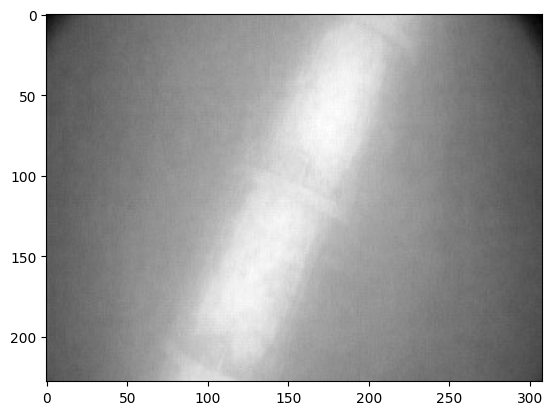

In [10]:
plt.imshow(x_test[100], cmap='gray')

In [15]:
# Encoder
encoder_input = layers.Input(
    shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]), name="encoder_input"
)
x = layers.Conv2D(32, (3, 3), strides=2, activation="relu", padding="same")(
    encoder_input
)
x = layers.Conv2D(64, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(128, (3, 3), strides=2, activation="relu", padding="same")(x)
shape_before_flattening = tf.shape(x)[1:]  # the decoder will need this!

x = layers.Flatten()(x)
encoder_output = layers.Dense(EMBEDDING_DIM, name="encoder_output")(x)

encoder = models.Model(encoder_input, encoder_output)
encoder.summary()

ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```
